In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
import sklearn

In [2]:
#access dataset from GitHub link
url_link = 'https://raw.githubusercontent.com/akbarhusnoo/Logistic-Regression-Portuguese-Bank-Marketing/main/Portuguese%20Bank%20Marketing%20Dataset.csv'

#read file
df_bank = pd.read_csv(url_link)

#display top 5 rows
display(df_bank.head())


#display number of rows and columns
print('\nShape of dataset = ', df_bank.shape)

#display list of attributes present in dataset
print('\nList of Attributes:\n ', list(df_bank.columns))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1



Shape of dataset =  (41188, 21)

List of Attributes:
  ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [3]:
#check if there are missing values in dataset
print(df_bank.isnull().values.any())

False


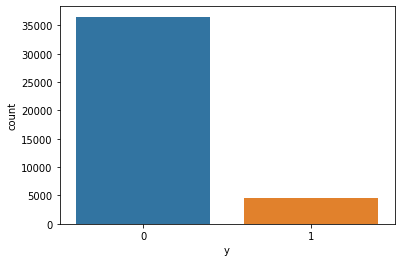

In [4]:
#visualise the target variable
sns.countplot(x ='y', data = df_bank)
plt.show()

In [5]:
#label encoding for all categorical variables in dataset
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_bank['job'] = label_encoder.fit_transform(df_bank['job'])
df_bank['marital'] = label_encoder.fit_transform(df_bank['marital'])
df_bank['education'] = label_encoder.fit_transform(df_bank['education'])
df_bank['default'] = label_encoder.fit_transform(df_bank['default'])
df_bank['housing'] = label_encoder.fit_transform(df_bank['housing'])
df_bank['loan'] = label_encoder.fit_transform(df_bank['loan'])
df_bank['contact'] = label_encoder.fit_transform(df_bank['contact'])
df_bank['month'] = label_encoder.fit_transform(df_bank['month'])
df_bank['day_of_week'] = label_encoder.fit_transform(df_bank['day_of_week'])
df_bank['poutcome'] = label_encoder.fit_transform(df_bank['poutcome'])

In [6]:
#segment dataset into features set
X = df_bank.loc[:, list(df_bank.columns)[0:20]]

In [7]:
#calculate Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X.columns 
  
# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
display(vif_scores)

,Attribute,VIF Scores
0,age,19.743263
1,job,2.120103
2,marital,5.654637
3,education,4.463138
4,default,1.404255
5,housing,2.205619
6,loan,1.207795
7,contact,2.842877
8,month,6.776792
9,day_of_week,3.085540


In [8]:
#segment dataset into features and target
X = df_bank.loc[:, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous']]
y = df_bank['y']

#split dataset into training and testing features and targets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [9]:
#fit logistic regression model to data
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

/Users/akbar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
#evaluate model using test data
y_predicted = logistic_regression_model.predict(X_test)
display(y_predicted)

#compute confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicted)
print('\nThe Confusion Matrix is as follows:\n', confusion_matrix)

#compute performance metrices
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
print('\nArea Under the Receiver Operating Characteristic Curve:', roc_auc_score(y_test, y_predicted))
print('\nPrecision:', precision_score(y_test, y_predicted))

array([0, 0, 0, ..., 0, 0, 0])


The Confusion Matrix is as follows:
 [[10767   194]
 [ 1052   344]]

Area Under the Receiver Operating Characteristic Curve: 0.6143596115323173

Precision: 0.6394052044609665
